In [1]:
################################################################################
#######################    Time series decomposition    ########################
################################################################################
# For more information, check https://www.machinelearningplus.com/time-series/time-series-analysis-python/ 
### Load necessary modules -------------------------------
from dateutil.parser import parse 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [2]:
# Import data
df = pd.read_csv('Unemployment.dat', parse_dates=['DATE'], dayfirst=True, sep=' ', index_col='DATE')
df.head()

,TOTAL
DATE,
2009-01-01,3327801
2009-02-01,3481859
2009-03-01,3605402
2009-04-01,3644880
2009-05-01,3620139


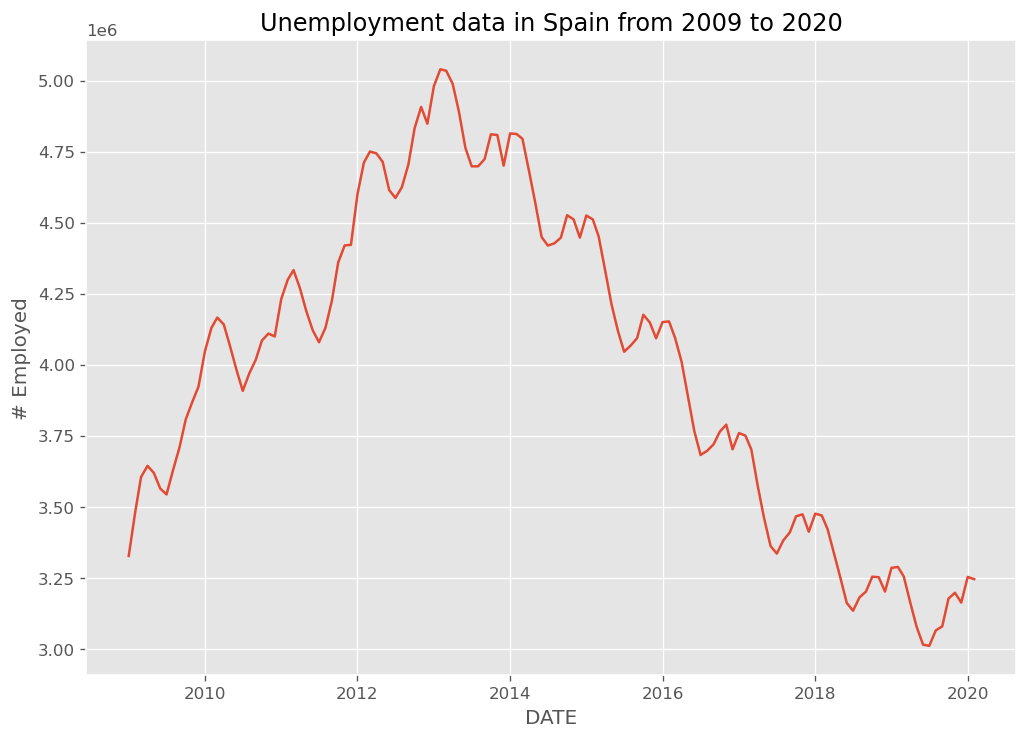

In [3]:
# Plotting a time series
fig, ax = plt.subplots()
ax.plot('TOTAL', data=df)
ax.set(title='Unemployment data in Spain from 2009 to 2020', xlabel='DATE', ylabel='# Employed')
plt.show()

In [4]:
# Extracting a portion of a time series
df_cut = df.loc['2015-03-01':]
df_cut = df.loc[:'2012-08-01']
df_cut = df.loc['2016-01-01':'2017-01-01']
df_cut = df.head()

<Figure size 1200x840 with 0 Axes>

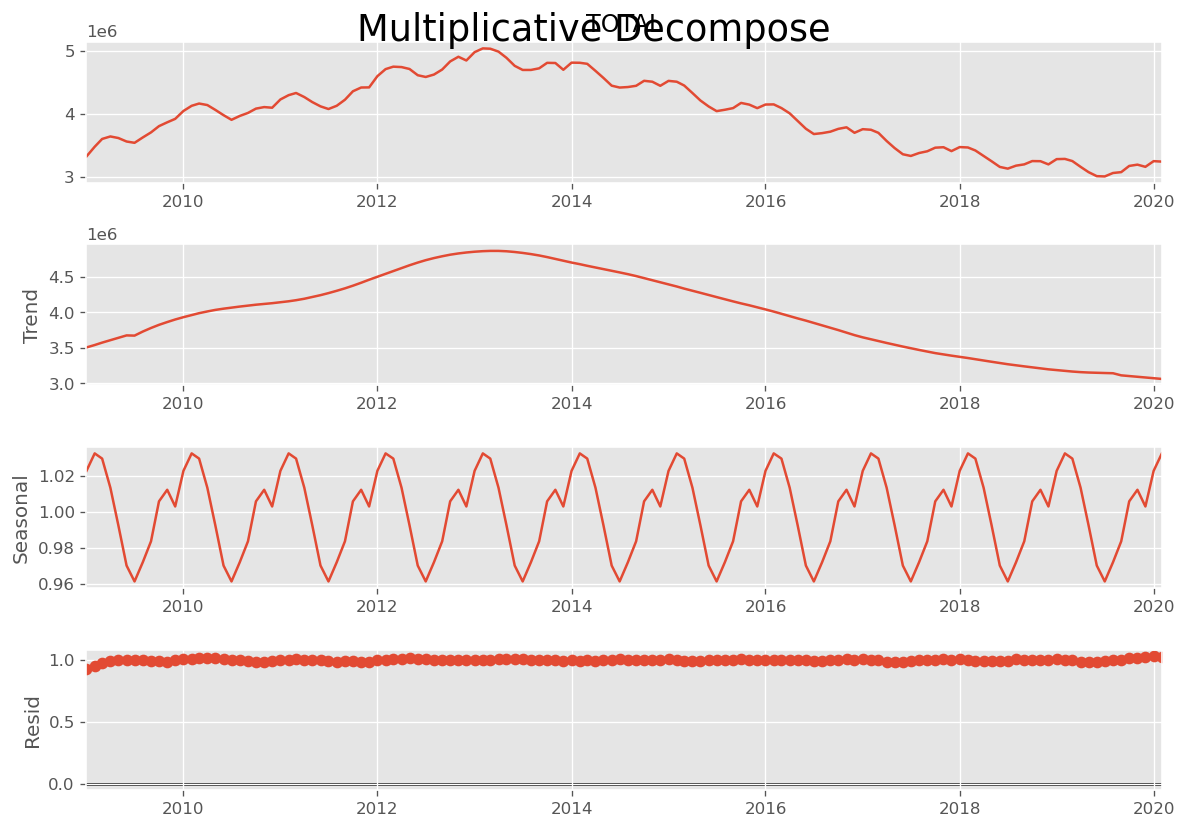

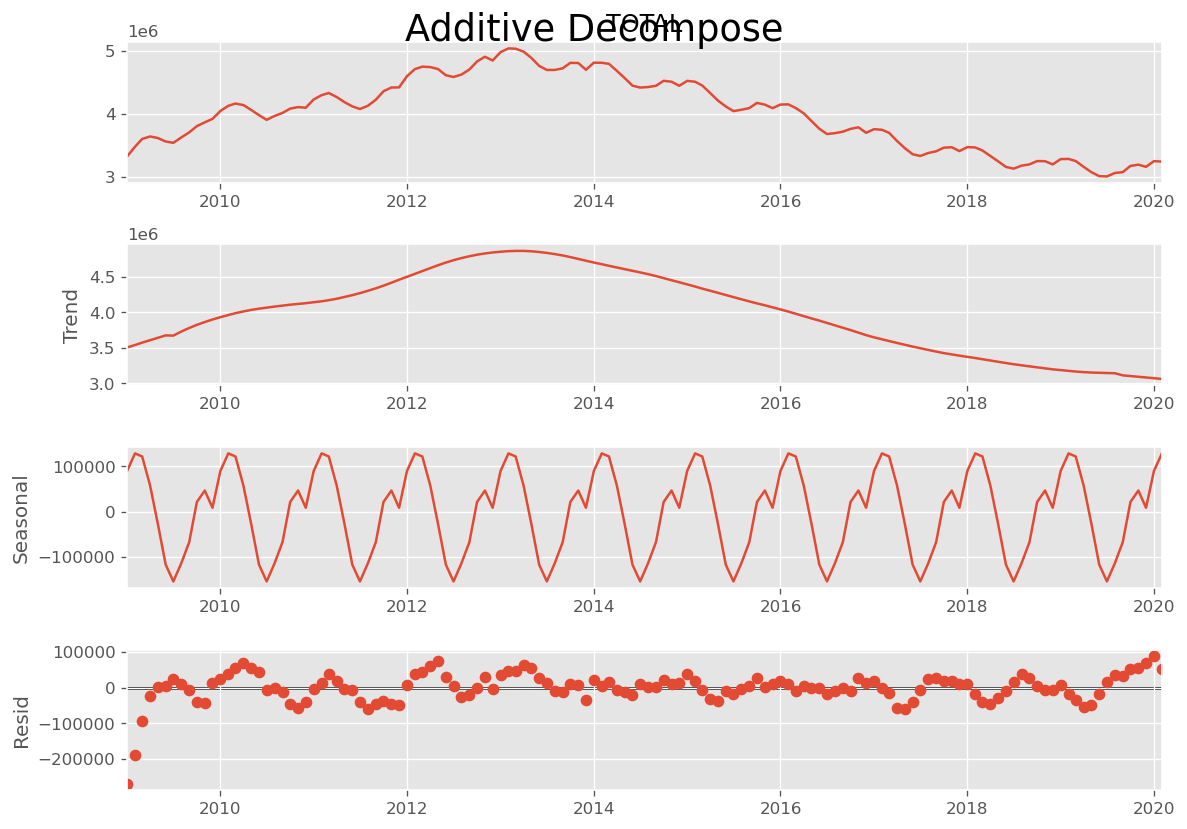

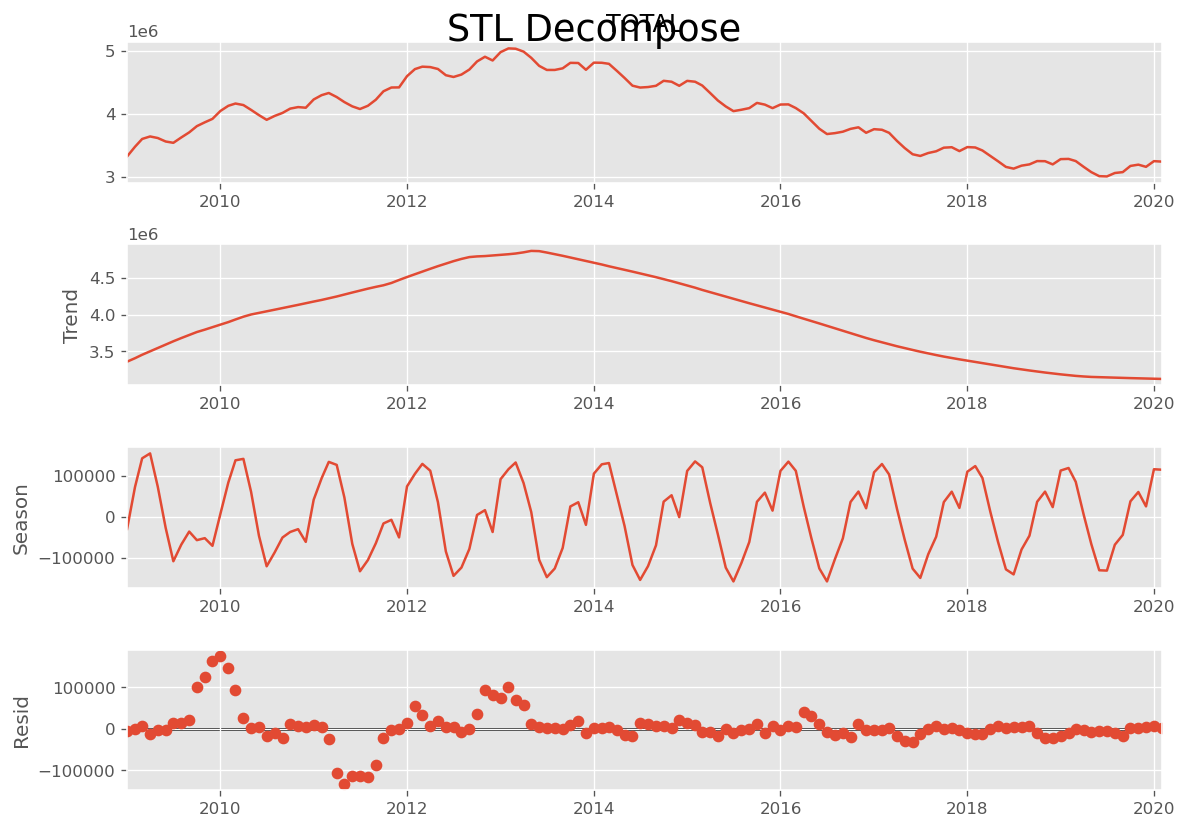

In [5]:
# Decomposition methods
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['TOTAL'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['TOTAL'], model='additive', extrapolate_trend='freq')

# Instead of SEATS decomposition, STL is highly more supported in Python environment
stl = STL(df['TOTAL'], period=12, robust=True)
result_stl = stl.fit()
# Plot the results
plt.figure()
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
result_stl.plot().suptitle('STL Decompose', fontsize=22)
plt.show()

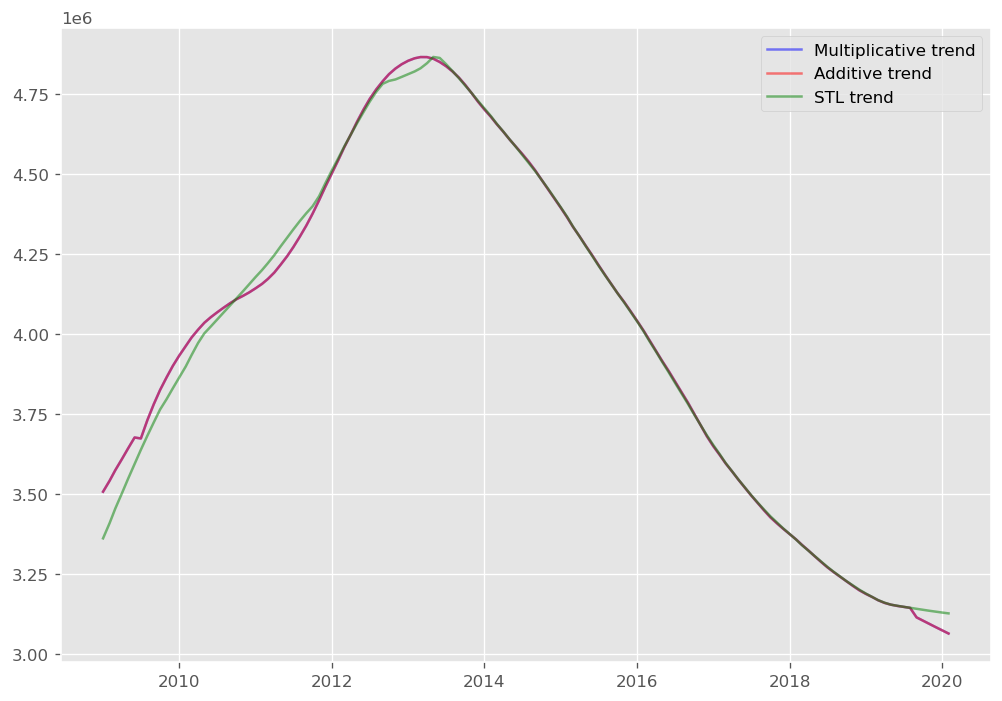

In [8]:
# Plot components together
plt.figure()
plt.plot(result_mul.trend, color='blue', alpha=0.5, label='Multiplicative trend')
plt.plot(result_add.trend, color='red', alpha=0.5, label='Additive trend')
plt.plot(result_stl.trend, color='green', alpha=0.5, label='STL trend')
plt.legend()
plt.show()